Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import os.path
import seaborn as sns
import matplotlib.pyplot as plt 
import cv2
plt.style.use('seaborn')

In [2]:
Flowers_All_Path = Path("../datasets/flowers/flowers")

In [3]:
Flowers_Path = list(Flowers_All_Path.glob(r"*/*.jpg"))

In [4]:
Flowers_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Flowers_Path))


In [5]:
image_path = pd.Series(Flowers_Path,name="ImagePath").astype(str)

In [6]:
image_lables = pd.Series(Flowers_Labels,name="Type")

In [7]:
display(image_path.head())

0    ..\datasets\flowers\flowers\daisy\100080576_f5...
1    ..\datasets\flowers\flowers\daisy\10140303196_...
2    ..\datasets\flowers\flowers\daisy\10172379554_...
3    ..\datasets\flowers\flowers\daisy\10172567486_...
4    ..\datasets\flowers\flowers\daisy\10172636503_...
Name: ImagePath, dtype: object

In [8]:
df = pd.concat([image_path,image_lables],axis=1)

In [9]:
df

,ImagePath,Type
0,..\datasets\flowers\flowers\daisy\100080576_f5...,daisy
1,..\datasets\flowers\flowers\daisy\10140303196_...,daisy
2,..\datasets\flowers\flowers\daisy\10172379554_...,daisy
3,..\datasets\flowers\flowers\daisy\10172567486_...,daisy
4,..\datasets\flowers\flowers\daisy\10172636503_...,daisy
...,...,...
4318,..\datasets\flowers\flowers\tulip\9831362123_5...,tulip
4319,..\datasets\flowers\flowers\tulip\9870557734_8...,tulip
4320,..\datasets\flowers\flowers\tulip\9947374414_f...,tulip
4321,..\datasets\flowers\flowers\tulip\9947385346_3...,tulip


In [10]:
df.shape

(4323, 2)

In [11]:
df = df.sample(frac=1).reset_index(drop=True)

In [12]:
df.drop_duplicates(subset=None, inplace=True)
df.shape

(4323, 2)

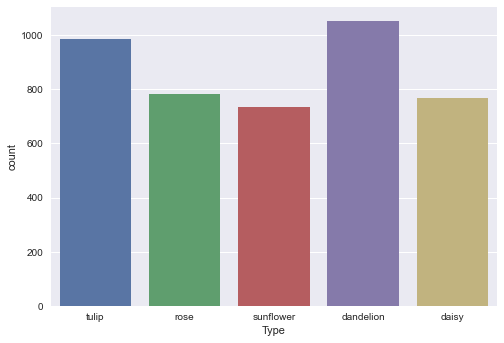

In [13]:
plt.style.use('seaborn')
sns.countplot(x='Type', data=df)
plt.show()

Text(0.5, 1.0, 'tulip')

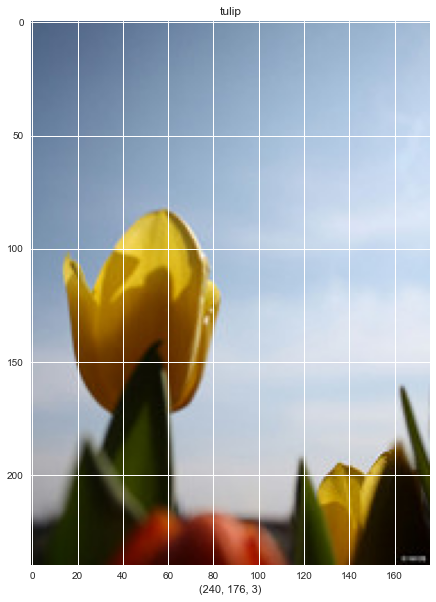

In [14]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(df["ImagePath"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(df["Type"][0])

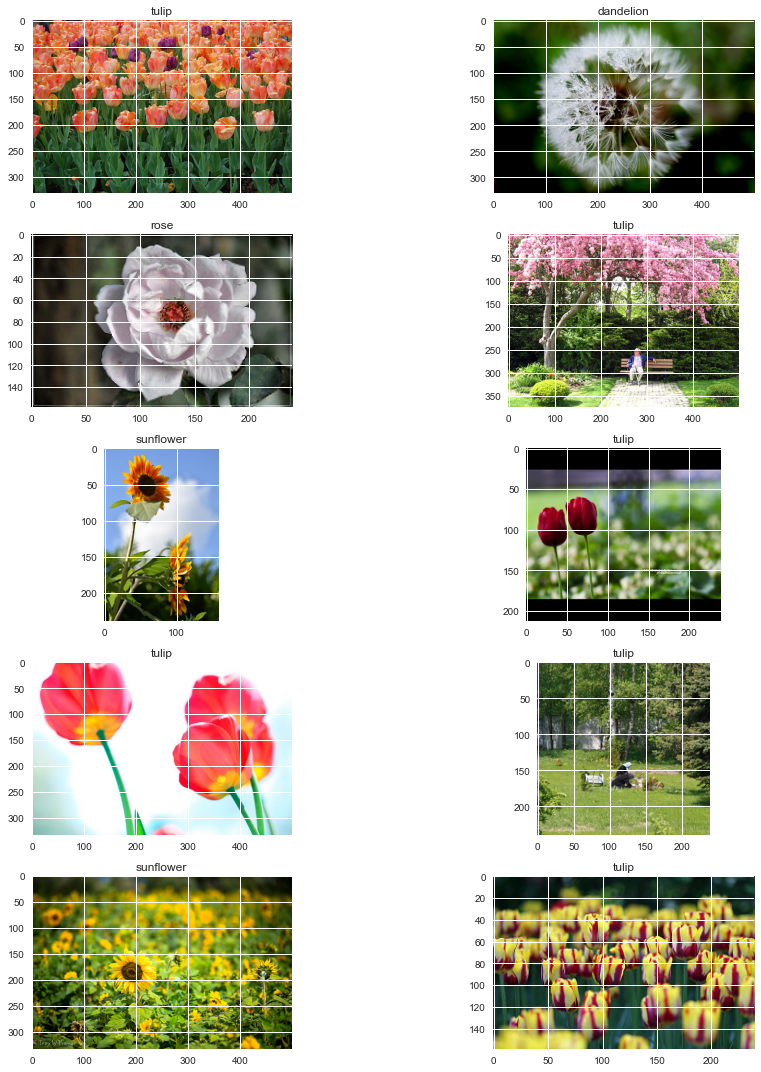

In [15]:
import random

fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(df[['Type']].values))
        ax[i,j].imshow(plt.imread(df.iloc[l,0]))
        ax[i,j].set_title(df.iloc[l,1])
        
plt.tight_layout()

# Features and target seperating + Label and Categorical Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()

In [17]:
X = df.iloc[:,0]
y = df.iloc[:,1]

## Transforming and converting target values to categorical values

In [18]:
y = le.fit_transform(y)
y = to_categorical(y, 5)

## Reading images data path to get image in array formats

In [19]:
flower_imgs = []
for i in X:
    img = cv2.imread(i)
    img = cv2.resize(img, (64,64))
    flower_imgs.append(img)

## Standardizing images array

In [20]:
flower_imgs = np.array(flower_imgs)
flower_imgs = flower_imgs.astype('float32')/255.0

In [21]:
X = flower_imgs

In [22]:
y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [23]:
X_train = X
y_train = y

# Model

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [51]:
model = Sequential([
    Flatten(input_shape=(64,64,3)),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

## Compile

In [52]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training

In [53]:
history = model.fit(X_train,np.array(y_train), epochs=100,)

Epoch 1/100
136/136 [==============================] - 1s 6ms/step - loss: 2.9564 - accuracy: 0.3175
Epoch 2/100
136/136 [==============================] - 1s 8ms/step - loss: 1.3681 - accuracy: 0.4234
Epoch 3/100
136/136 [==============================] - 1s 8ms/step - loss: 1.2962 - accuracy: 0.4668
Epoch 4/100
136/136 [==============================] - 1s 8ms/step - loss: 1.2179 - accuracy: 0.5147
Epoch 5/100
136/136 [==============================] - 1s 8ms/step - loss: 1.1802 - accuracy: 0.5010
Epoch 6/100
136/136 [==============================] - 1s 7ms/step - loss: 1.1038 - accuracy: 0.5356
Epoch 7/100
136/136 [==============================] - 1s 8ms/step - loss: 1.1291 - accuracy: 0.5392
Epoch 8/100
136/136 [==============================] - 1s 8ms/step - loss: 1.1156 - accuracy: 0.5439
Epoch 9/100
136/136 [==============================] - 1s 8ms/step - loss: 1.0482 - accuracy: 0.5775
Epoch 10/100
136/136 [==============================] - 1s 8ms/step - loss: 1.1063 - accura

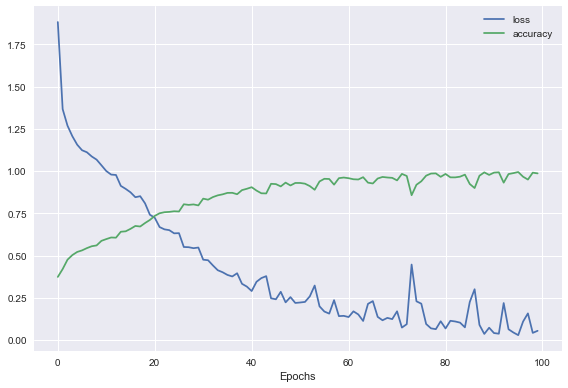

In [54]:
plt.style.use('seaborn')
pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.tight_layout()

# Loading Testing Data

In [29]:
Flowers_All_Path = Path("../datasets/flowers")
Flowers_Path = list(Flowers_All_Path.glob(r"*/*.jpg"))
Flowers_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Flowers_Path))

image_path = pd.Series(Flowers_Path,name="ImagePath").astype(str)
image_lables = pd.Series(Flowers_Labels,name="Type")

In [30]:
df_test = pd.concat([image_path,image_lables],axis=1)

In [31]:
df_test.head()

,ImagePath,Type
0,..\datasets\flowers\daisy\100080576_f52e8ee070...,daisy
1,..\datasets\flowers\daisy\10140303196_b88d3d6c...,daisy
2,..\datasets\flowers\daisy\10172379554_b296050f...,daisy
3,..\datasets\flowers\daisy\10172567486_2748826a...,daisy
4,..\datasets\flowers\daisy\10172636503_21bededa...,daisy


In [32]:
df_test.shape

(4323, 2)

In [33]:
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [34]:
df_test.drop_duplicates(subset=None, inplace=True)
df_test.shape

(4323, 2)

# Seperating Features and Target of test data set

In [35]:
X = df_test.iloc[:,0]
y = df_test.iloc[:,1]

## Transforming and converting target values to categorical values

In [36]:
y = le.fit_transform(y)
y = to_categorical(y, 5)

## Reading images data path to get image in array formats

In [38]:
flower_imgs = []
for i in X:
    img = cv2.imread(i)
    img = cv2.resize(img, (64,64))
    flower_imgs.append(img)

## Standardizing images array

In [39]:
flower_imgs = np.array(flower_imgs)
flower_imgs = flower_imgs.astype('float32')/255.0

In [40]:
X = flower_imgs

In [41]:
y

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [42]:
X_test = X
y_test = y

# Model Evaluation

136/136 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9882


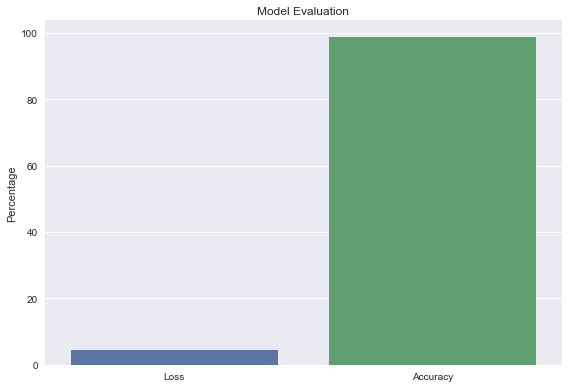

In [55]:
loss,acc = model.evaluate(X,y)
plt.style.use('seaborn')
sns.barplot(data=pd.DataFrame([{'Loss':loss,"Accuracy":acc}])*100)
plt.ylabel("Percentage")
plt.title("Model Evaluation")
plt.tight_layout()

# Prediction

In [56]:
y_pred = model.predict(X_test)

In [57]:
y_pred.argmax(1)

array([2, 4, 1, ..., 1, 1, 0], dtype=int64)

# Prediction Visualization with Test Data

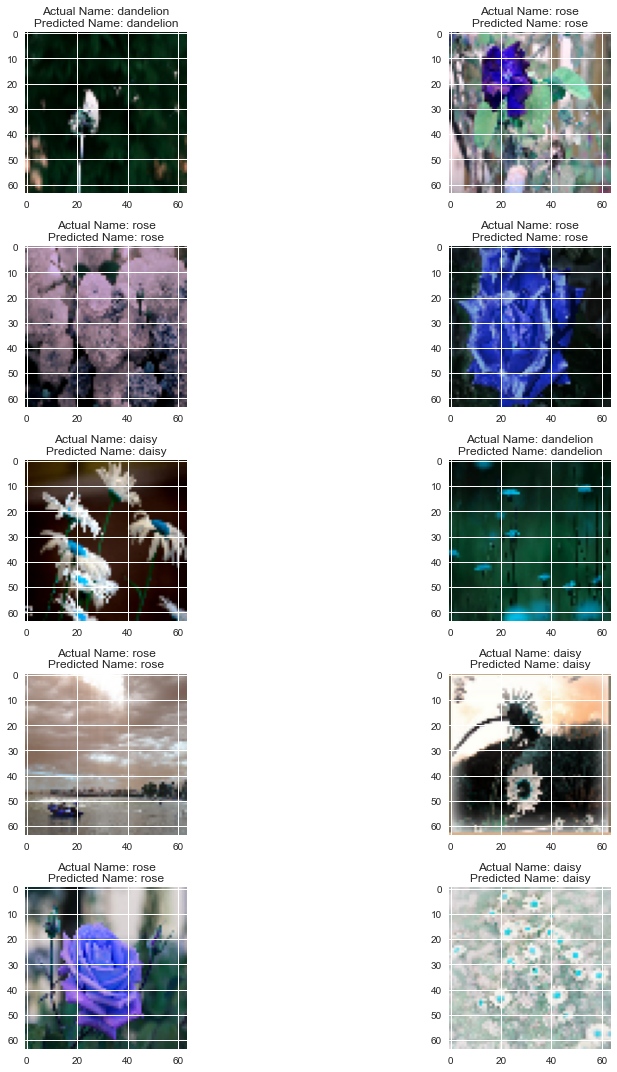

In [58]:
import random
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(X_test))
        ax[i,j].imshow(X_test[l])
        ax[i,j].set_title("Actual Name: "+"".join(le.inverse_transform(y_test.argmax(1))[l])+
        "\nPredicted Name: "+"".join(le.inverse_transform(y_pred.argmax(1))[l]))
        
plt.tight_layout()

# Accuracy

In [61]:
from sklearn.metrics import accuracy_score
print("Accuracy {:.3f}".format(accuracy_score(y_test.argmax(1),y_pred.argmax(1))*100))

Accuracy 98.820
